In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 -  Lendo o arquivo csv com dados já manipulados

In [2]:
dados= pd.read_csv('dados_aluguel_manipulados_ml_sao_paulo.csv')

In [3]:
dados.head()

,zona,enderecos_lista,aluguel,area_m²,quartos
0,norte,"Rua Abaíbas, Vila Palmeiras, São Paulo Zona No...",750,40.0,1.0
1,norte,"Avenida Elísio Teixeira Leite, Vila Brasilândi...",1155,50.0,2.0
2,norte,"Rua Canner, Vila Pereira Cerca, São Paulo Zona...",1000,48.0,2.0
3,norte,"Rua Tanque Velho, Vila Nivi, São Paulo Zona No...",1300,70.0,2.0
4,norte,"Rua Moreira, Vila Romero, São Paulo Zona Norte...",950,25.0,1.0


In [4]:
dados.describe(include='all')

,zona,enderecos_lista,aluguel,area_m²,quartos
count,1344,1344,1344.000000,1343.000000,1294.000000
unique,4,1075,NaN,NaN,NaN
top,sul,"Rua Voluntários Da Pátria, Santana, São Paulo ...",NaN,NaN,NaN
freq,336,10,NaN,NaN,NaN
mean,NaN,NaN,3372.289435,106.671631,2.058733
std,NaN,NaN,12055.109424,304.568303,0.868605
min,NaN,NaN,299.000000,1.000000,1.000000
25%,NaN,NaN,1407.500000,48.000000,1.000000
50%,NaN,NaN,2032.000000,64.000000,2.000000
75%,NaN,NaN,3160.750000,93.000000,3.000000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1344 non-null   object 
 1   enderecos_lista  1344 non-null   object 
 2   aluguel          1344 non-null   int64  
 3   area_m²          1343 non-null   float64
 4   quartos          1294 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.6+ KB


In [6]:
dados.zona.value_counts()

sul      336
oeste    336
norte    336
leste    336
Name: zona, dtype: int64

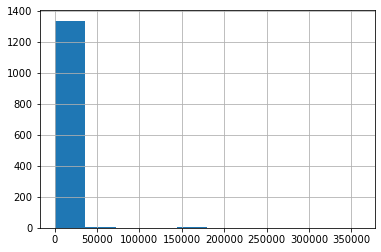

In [7]:
dados['aluguel'].hist()

 - Filtrando outliers

In [8]:
dados_filtrado = dados.query('aluguel <= 20000')

 - Visualizando dados do preço do aluguel

In [9]:
preco = dados_filtrado.aluguel.value_counts().to_frame().reset_index()

In [10]:
preco.columns= ['preco_aluguel', 'quantidade']

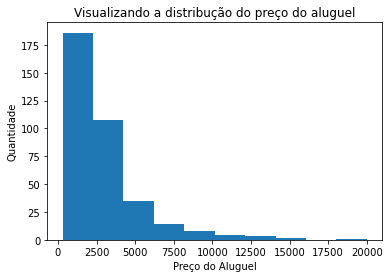

In [18]:
plt.hist(preco.preco_aluguel.sort_values())
plt.xlabel('Preço do Aluguel')
plt.ylabel('Quantidade')
plt.title('Visualizando a distribução do preço do aluguel')
plt.show()

In [20]:
dados_filtrado.head()

,zona,enderecos_lista,aluguel,area_m²,quartos
0,norte,"Rua Abaíbas, Vila Palmeiras, São Paulo Zona No...",750,40.0,1.0
1,norte,"Avenida Elísio Teixeira Leite, Vila Brasilândi...",1155,50.0,2.0
2,norte,"Rua Canner, Vila Pereira Cerca, São Paulo Zona...",1000,48.0,2.0
3,norte,"Rua Tanque Velho, Vila Nivi, São Paulo Zona No...",1300,70.0,2.0
4,norte,"Rua Moreira, Vila Romero, São Paulo Zona Norte...",950,25.0,1.0


Text(0, 0.5, 'Aluguel')

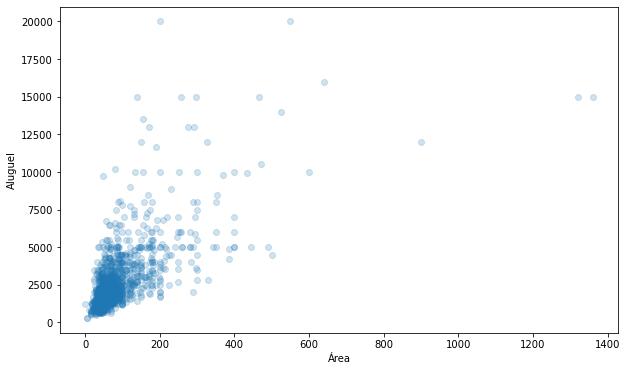

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(dados_filtrado['area_m²'], dados_filtrado['aluguel'], alpha=0.2)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('Área')
plt.ylabel('Aluguel')

 Como pode ser observado , os pontos se concentram numa faixa de preço de até 2500 reais, podendo passar um pouco e a área sendo menor que 100 m².

In [12]:
import warnings
warnings.filterwarnings('ignore')

  - Visualizando oa distruibuição dos daddos em função da zona.

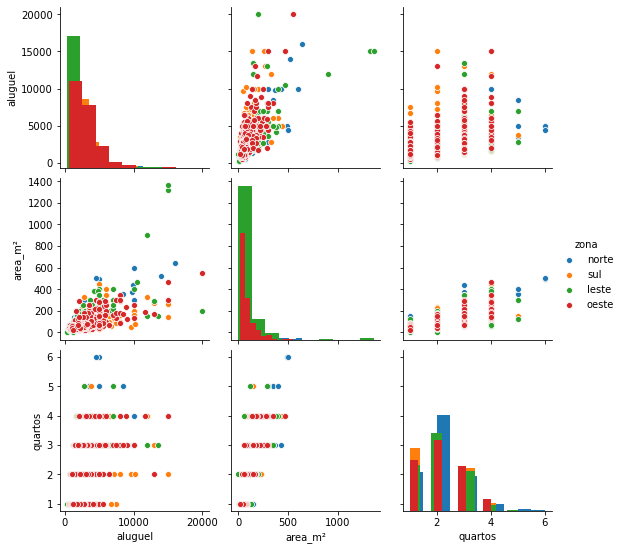

In [13]:
sns.pairplot(dados_filtrado, hue="zona", diag_kind="hist")

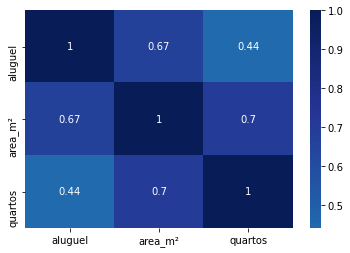

In [24]:
sns.heatmap(dados_filtrado.corr(), annot=True, center=0, cmap="YlGnBu")

 - Verificando a existência de outliers.

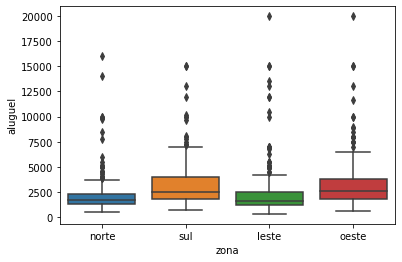

In [23]:
sns.boxplot(x='zona', y='aluguel', data=dados_filtrado)